In [2]:
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as matplt

# Vektoren

- Erzeuge zwei NumPy arrays `a` und `b`, welche wie folgt definiert sind:


>$\mathbf{a}=
\left(
\begin{array}{c}
-1.0\\
2.0\\
\end{array}
\right)$

>$\mathbf{b}=
\left(
\begin{array}{c}
4.0\\
6.0\\
\end{array}
\right)$

In [69]:
list_a = [-1.0, 2.0] 

a = np.array(list_a)

print(a)

list_b = [4.0, 6.0]

b = np.array(list_b)

print(b)

print(a.shape)


[-1.  2.]
[4. 6.]
(2,)


### Vektor Produkte

Berechne folgende Produkte:


- Skalarprodukt: $c = \mathbf{a}^\mathrm{T}  \mathbf{b}$
- Dyadisches Produkt (engl. Outer Product): $\mathbf{C} = \mathbf{a} \mathbf{b}^\mathrm{T}$
- Elementweise Multiplikation: $\mathbf{c} = \mathbf{a} \odot \mathbf{b}$ where $c_i = a_i \cdot b_i$


> *Reference:* https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.linalg.html

In [70]:
### Lösung ###
### Berechung ###

c = np.vdot(a,b)
print(c)

d = np.inner(a,b)
print(d)

e = np.outer(a,b)
print(e)

f = a * b
print(f)

8.0
8.0
[[-4. -6.]
 [ 8. 12.]]
[-4. 12.]


# Matrizenrechnung

- Bilde eine Matrix $\mathbf{A}$ mit: $\text{rang}(\mathbf{A})=2$ und $\mathbf{A} \in \mathbb{R}^{2 \times 2}$

- Bilde eine Matrix $\mathbf{B}$ mit: $\mathbf{B} \in \mathbb{R}^{2 \times 2}$ mit zufällige Komponenten

Berechne:

- $\mathbf{A}\mathbf{A}^{-1}$
- $\mathbf{B}\mathbf{B}^{-1}$

In [5]:
### Lösung ###

###np.random.seed() with a seed die Zufallzahl angesiedelt

A = np.matrix([[1., 2.],[3., 5.]])
B = np.random.random([2,2])*10

print(A)
print(B)

[[1. 2.]
 [3. 5.]]
[[8.83075789 0.60249488]
 [1.80756061 7.63914436]]


In [6]:
print(B @ np.linalg.inv(B)) ### @ matrix multiplikationg, rest fehler würde passieren
print(A @ np.linalg.inv(A)) ### 1,2|3,6 没有inverse Matrix

[[ 1.00000000e+00  1.36577426e-17]
 [-3.15268955e-17  1.00000000e+00]]
[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


# Funktionen

Der euklidischen Abstand für die Vektoren $\mathbf{a}$ und $\mathbf{b}$ ist wie folgt definiert:

$$d(\mathbf{a}, \mathbf{b})=\|\mathbf{b}-\mathbf{a}\|_{2}=\sqrt{\left(b_{1}-a_{1}\right)^{2}+\cdots+\left(b_{n}-a_{n}\right)^{2}}=\sqrt{\sum_{i=1}^{n}\left(b_{i}-a_{i}\right)^{2}}$$

> Implementieren Sie die Funktion `euc_dist_loop(a, b)` unter Verwendung einer [for loop](https://docs.python.org/3/tutorial/controlflow.html).
>   - *Note:* Wurzelberechnung `np.sqrt`.

- Wie kann man die Berechnung effizienter gestalten?

In [73]:
### Lösung ###
def euc_dist_loop(a,b):
    dist = 0 #for aktuelle aufsummierte abstand
    for index, ai in enumerate(a):
        dist += (a[index] - b[index])**2
    sqrt_dist = np.sqrt(dist)
    return sqrt_dist


def function(a,b):
    diff = a - b
    dist = np.inner(diff,diff)
    return np.sqrt(dist)

In [74]:
print(euc_dist_loop(a,b))

print(function(a,b))
# use the library
# https://realpython.com/python-enumerate/

6.4031242374328485
6.4031242374328485


# Klassen

In [75]:
# Beispiel

class ExampleClass:
    def __init__(self,i):
        print('I run when we create an object.', i)
        # Saving a variable with `self.var = var` enables other methods in a class
        # to have access to that variable.
        self.i = i
        self.variable = 'I am a variable.'       
        
    def __call__(self):
        print('I run when the object is called')
        
    def some_method(self):
        print('The variable can be accessed in this method:', self.variable)
        print('I am a method.')

In [76]:
obj = ExampleClass(1) # Create object out of class, calls the __init__ method

I run when we create an object. 1


In [77]:
obj()                # Call the object, runs the __call__ method, auch als Funktion aufrufen mit Variablen

I run when the object is called


In [78]:
obj = ExampleClass(2) # Create object out of class, calls the __init__ method
obj()                # Call the object, runs the __call__ method
obj.some_method()    # Call some_method from the object.
obj.variable         # Get the value of the variable defined in the object.

I run when we create an object. 2
I run when the object is called
The variable can be accessed in this method: I am a variable.
I am a method.


'I am a variable.'

### p-Norm

Der euklidische Abstand ist eine spezielle Form der [p-Norm](https://en.wikipedia.org/wiki/Norm_(mathematics)#p-norm).
$$pnorm_p(\mathbf{u},\mathbf{v}) = (\sum_d^D |u_d - v_d|^p)^{\frac{1}{p}}$$

- Erstellen Sie die Klasse `PNorm`, die den Wert von $p$ als Initialisierungsparameter erhält. Die Methode `__call__` soll zwei Vektoren als Eingangsargumente haben und deren Abstand zurückgeben.

In [79]:
### Lösung ###
class PNorm:
    def __init__(self, p):
        self.p = p
    
    def __call__(self, u, v):
        p = self.p
        dist = 0;
        for index, ui in enumerate(u):
            dist += np.abs(ui - v[index])**p
        print(dist**(1/p))
        
## (u-v)**p auch möglich

In [80]:
euc_norm = PNorm(2)
euc_norm(a,b)

6.4031242374328485


### Mahalanobis Abstand

Der [Mahalanobis-Abstand](https://en.wikipedia.org/wiki/Mahalanobis_distance) zweier Vektoren $\mathbf{u}$, $\mathbf{v}$ bei einer Kovarianzmatrix $\mathbf{S}$ ist gegeben durch:

>$$\Delta(\mathbf{u}, \mathbf{v}) = \sqrt{(\mathbf{u}-\mathbf{v})^T\mathbf{S}^{-1}(\mathbf{u}-\mathbf{v})}$$

Eine Kovarianzmatrix ist eine symmetrische, positiv semidefinite Matrix. Verwenden Sie die bereitgestellte Matrix S:


>$S=\begin{pmatrix}1 & 0.5 \\\ 0.5 & 1 \end{pmatrix}$

- Implementieren Sie eine Klasse `Mahalanobis`, die die Matrix von $\mathbf{S}$ als Initialisierungsparameter erhält. Die Aufrufmethode sollte zwei Vektoren erhalten und deren Abstand zurückgeben

In [81]:
### Lösung ###
class Mahalanobis:
    def __init__(self, S):
        self.S = S
    
    def __call__(self, u, v):
        dist = np.transpose(np.subtract(u,v)) @ np.linalg.inv(self.S) @ np.subtract(u,v)
        sqrt_dist = np.sqrt(dist)
        return sqrt_dist[0,0]

In [82]:
u = np.matrix([[-1.0],[2.0]])
v = np.matrix([[4.0],[6.0]])
S = np.matrix([[1.0, 0.5], [0.5, 1.0]])
np.transpose(u)

matrix([[-1.,  2.]])

In [83]:
distance = Mahalanobis(S)
distance(u,v)

5.2915026221291805

# Plotten


Plotten ist ein wichtiges Werkzeug für die Datenvisualisierung. Sie sollten dieses [quick tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html) über die Verwendung von matplotlib lesen.

- Verwenden Sie die mitgelieferte Funktion "plot_distances", um Ihre zuvor implementierten Abstandsfunktionen zu visualisieren.
- Die Funktion `plot_distance` nimmt eine beliebige Abstandsfunktion als Eingabe, die ihrerseits zwei Eingabeargumente hat.

In [94]:
def plot_distances(distf, base=np.array([0,0])):
    """
    Plot level contours of given distance function **distf** around the development point **base**

    Parameters:
    ===========
    distf - (x,y) -> d A function taking two arrays and returning a positive distance measure.

    base - base point to develop the contour lines around.
    """
    X, Y = np.mgrid[-3:3:0.1, -3:3:0.1]
    Z = np.zeros_like(X)

    for i,_ in enumerate(X):
        for j,_ in enumerate(Y):
            x = X[i,j]
            y = Y[i,j]
            pt = np.asarray([x,y])
            Z[i,j] = distf(pt, base)

    levels = np.arange(0,6,0.25)


    CS = matplt.contour(X, Y, Z, levels=levels)
    matplt.clabel(CS, inline=1, fontsize=10)
    matplt.grid(True)

- Probieren Sie für die p-Norm verschiedene Werte für "p" aus und stellen Sie den Abstand mit der Methode "plot_distance" dar. 

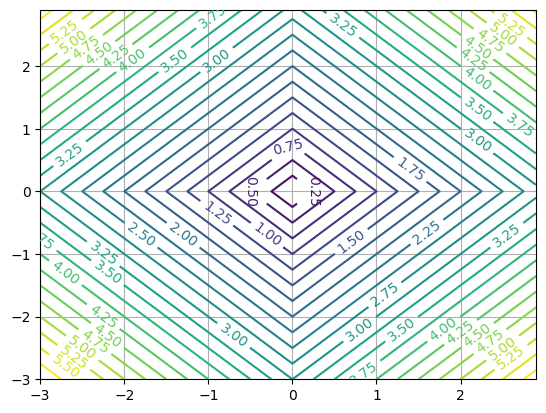

In [97]:
### Lösung ###
class pNorm:
    def __init__(self, p):
        self.p = p
    
    def __call__(self, u, v):
        p = self.p
        dist = 0;
        for index, ui in enumerate(u):
            dist += np.abs(ui - v[index])**p
        return dist**(1/p)

a1 = pNorm(1)

plot_distances(a1)


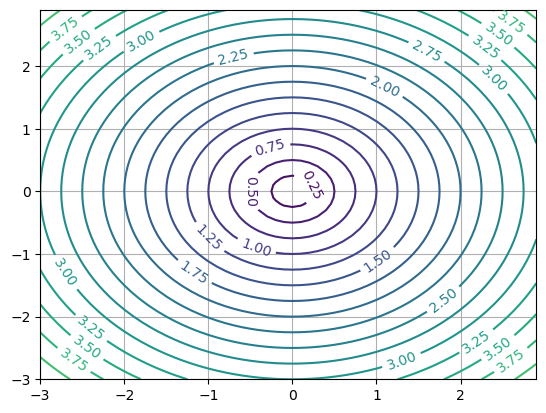

In [98]:
a2 = pNorm(2)

plot_distances(a2)

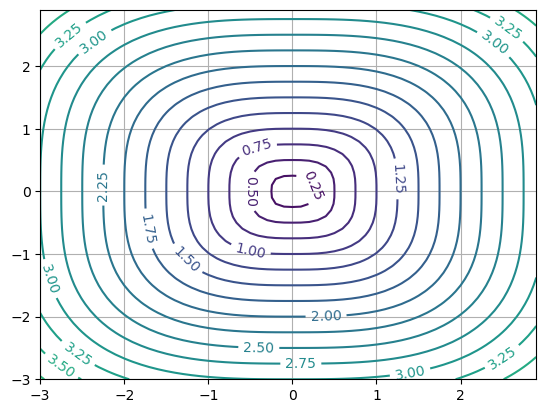

In [99]:
a3 = pNorm(3)

plot_distances(a3)

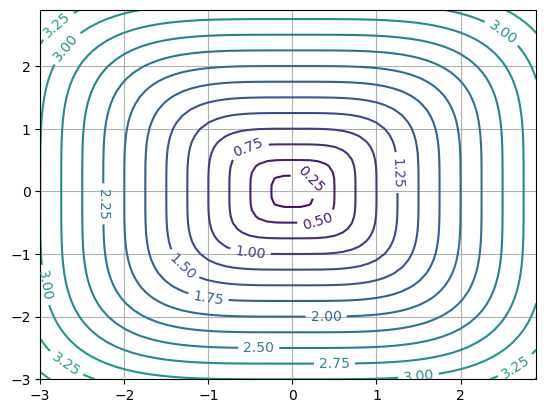

In [100]:
a4 = pNorm(4)

plot_distances(a4)

- Für den Mahalanobis-Abstand probieren Sie verschiedene Werte für die Kovarianzmatrix "S" aus und stellen den Abstand mit der Methode "plot_distance" dar. 

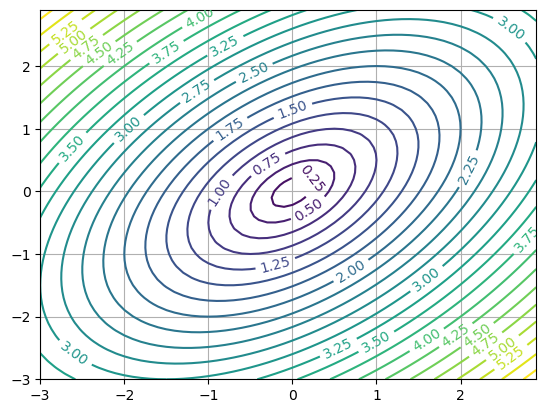

In [101]:
### Lösung ###
S1 = np.matrix([[1.0, 0.5], [0.5, 1.0]])
plot_distances(Mahalanobis(S1))

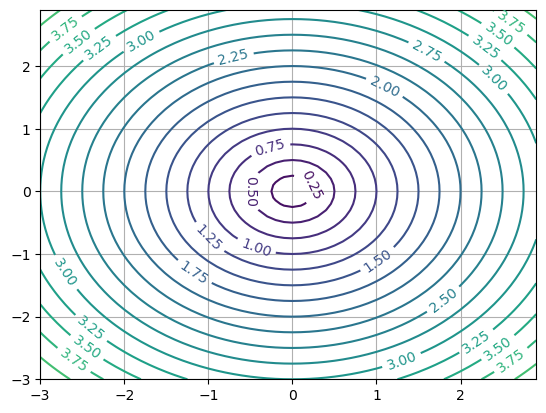

In [102]:
S2 = np.matrix([[1.0, 0.], [0., 1.0]])
plot_distances(Mahalanobis(S2))

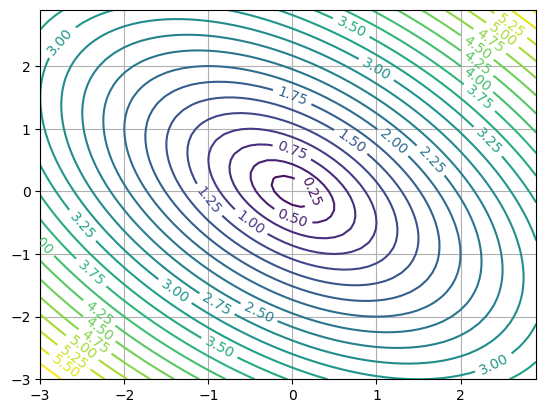

In [103]:
S3 = np.matrix([[1.0, -0.5], [-0.5, 1.0]])
plot_distances(Mahalanobis(S3))